In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
version = '0.1'
root = '/home/yons/workplace/python/bridge_detection'
config_file  = root + '/configs/%s.py' % version 
checkpoint_file = root + '/work_dirs/%s/latest.pth' % version
from mmdet.apis import init_detector, inference_detector
import mmcv
model = init_detector(config_file, checkpoint_file, device='cuda:0')


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
200


<Figure size 432x288 with 0 Axes>

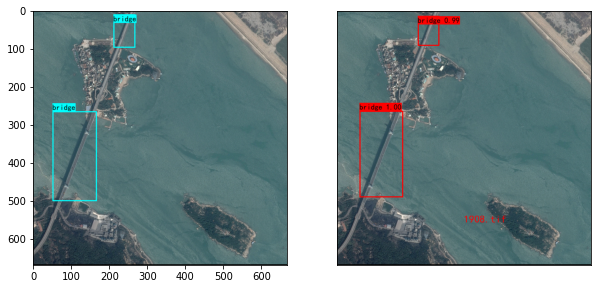

In [53]:
from pycocotools.coco import COCO
root = '/home/yons/data/jieyi/automatic_bridge_detection'
json_path = '/home/yons/data/jieyi/automatic_bridge_detection/instances_val2017.json'

coco=COCO(json_path)
img_dir = root + '/'
dst = 'bridge'
catIds = coco.getCatIds(catNms=[dst])
imgIds = coco.getImgIds(catIds=catIds)
print(len(imgIds))
import matplotlib.pyplot as plt
%matplotlib inline
img_id = imgIds[np.random.choice(len(imgIds))]
img = coco.loadImgs(img_id)[0]
image_id = img['file_name'].split('.')[0]
image_path = img_dir + '/%s.tif' % (image_id)
result = inference_detector(model, image_path)
from myutils import vis_predict
annIds = coco.getAnnIds(imgIds=img_id, iscrowd=None)
anns = coco.loadAnns(annIds)
bboxes = [[*ann['bbox'], ann['category_id']] for ann in anns]
from myutils import vis_coco
_ = plt.figure()
fig, axes = plt.subplots(1,2, figsize=(10,5)) 
vis_coco(image_path, bboxes, coco, ax=axes[0])
vis_predict(image_path, result, ax=axes[1] , thres=0.03, class_names=[dst], dst=[dst], title=image_path.split('/')[-1])



In [ ]:
from myutils import vis_predict, vis_gt
import random
for img_id in random.choices(imgIds, k=20):
# for img_id in imgIds[:20]:
    img = coco.loadImgs(img_id)[0]
    image_id = img['file_name'].split('.')[0]
    image_path = img_dir + '/%s.tif' % (image_id)
    result = inference_detector(model, image_path)
    _ = plt.figure()
    fig, axes = plt.subplots(1,2, figsize=(10,5)) 
    annIds = coco.getAnnIds(imgIds=img_id, iscrowd=None)
    anns = coco.loadAnns(annIds)
    bboxes = [[*ann['bbox'], ann['category_id']] for ann in anns]
    vis_coco(image_path, bboxes, coco, ax=axes[0], dst=[dst])
    vis_predict(image_path, result, ax=axes[1] , thres=0, class_names=[dst], dst=[dst], title=image_path.split('/')[-1]+'|'+str(img_id))
